In [7]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json
from class_mapping.class_loader import ClassDictionary

THRESHOLD = 0.5

In [8]:
file_path = 'val_img_name_to_all_GT_prompt_boxes.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [9]:
data

{'ILSVRC2012_val_00000293.JPEG': {'n_boxes': 4,
  'boxes': array([[  0.6059408,   0.8586347, 493.6087   , 373.56927  ],
         [239.92444  , 131.50444  , 482.68317  , 276.68555  ],
         [176.27422  , 190.50577  , 356.83237  , 333.49933  ],
         [175.81305  , 190.86598  , 500.99326  , 335.45898  ]],
        dtype=float32),
  'scores': array([0.10968552, 0.70738924, 0.32806498, 0.72832566], dtype=float32)},
 'ILSVRC2012_val_00002138.JPEG': {'n_boxes': 1,
  'boxes': array([[ 55.38422, 151.09969, 482.04083, 300.96893]], dtype=float32),
  'scores': array([0.73419255], dtype=float32)},
 'ILSVRC2012_val_00003014.JPEG': {'n_boxes': 2,
  'boxes': array([[177.06824, 322.14062, 270.49283, 367.52112],
         [162.13629, 320.25232, 287.90265, 373.69278]], dtype=float32),
  'scores': array([0.59043264, 0.20381708], dtype=float32)},
 'ILSVRC2012_val_00006697.JPEG': {'n_boxes': 1,
  'boxes': array([[168.00352, 235.14142, 341.7848 , 317.2771 ]], dtype=float32),
  'scores': array([0.7569133]

In [10]:
def save_bboxes_to_json(bbox_data, output_file):
    with open(output_file, 'w') as f:
        json.dump(bbox_data, f)

bbox_data = {}
class_dict = ClassDictionary()

for idx, (key, item) in enumerate(data.items()):
    item['gt'] = [class_dict.get_val_img_class(key)] * item['n_boxes']
    item['n_boxes'] = int(item['n_boxes'])
    item['boxes'] = item['boxes'].tolist()
    item['scores'] = item['scores'].tolist()
    bbox_data[key] = item

save_bboxes_to_json(bbox_data, 'bboxes_demo.json')

In [22]:
len(bbox_data)

50000

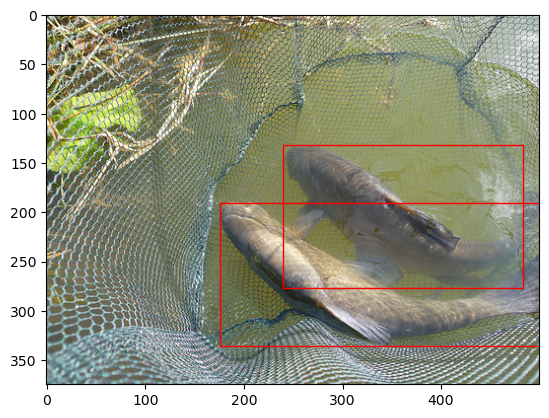

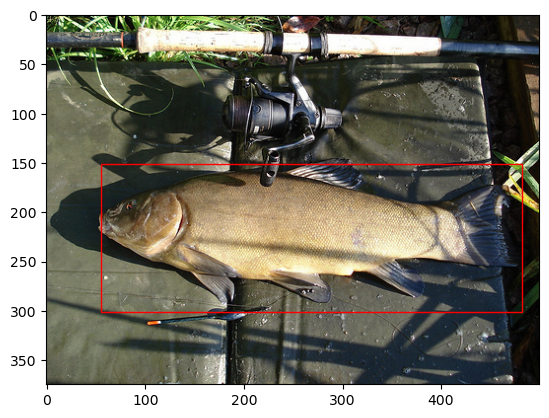

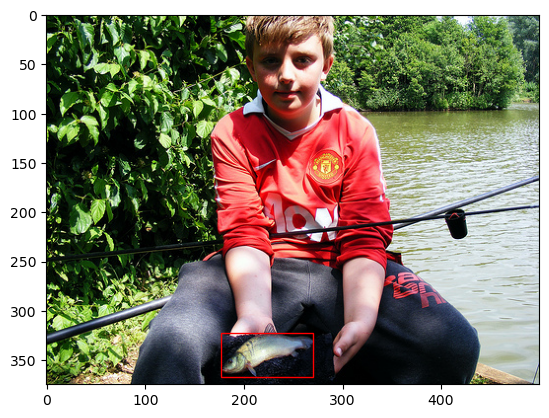

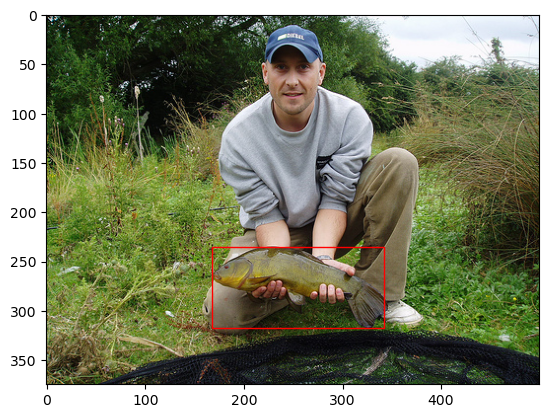

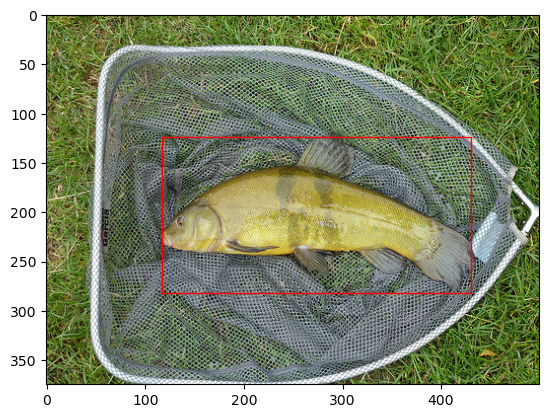

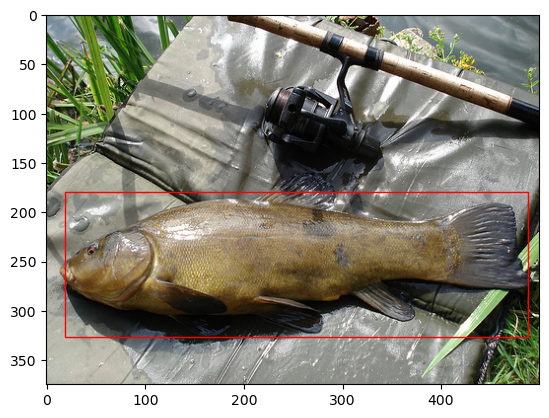

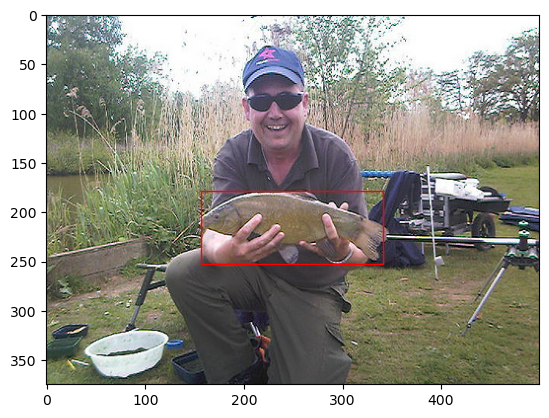

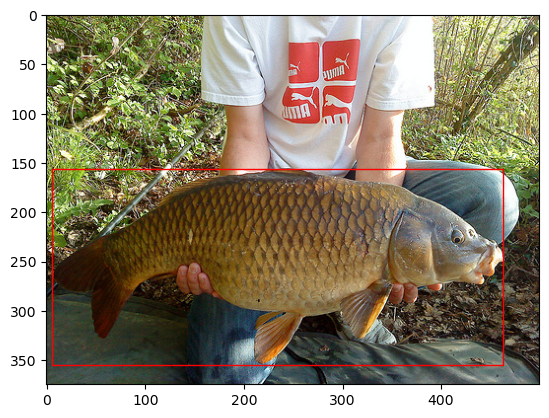

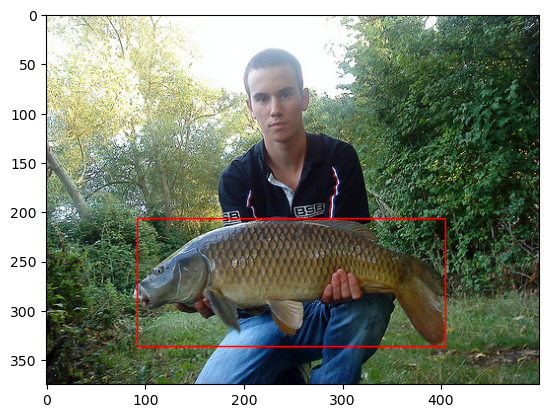

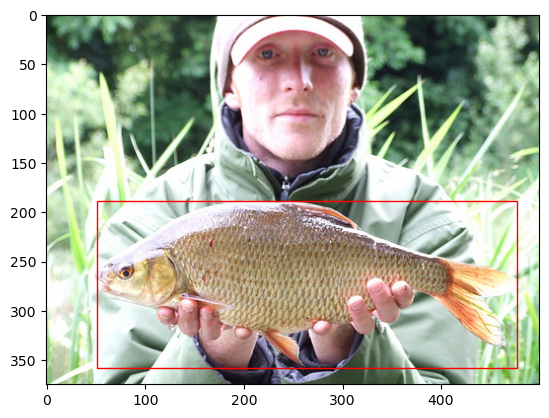

In [7]:
for idx, (key, item) in enumerate(data.items()):
    if idx >= 10:
        break

    image_path = f'D:/imagenet_val/n01440764/{key}'
    image = Image.open(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for i,box in enumerate(item['boxes']):
        if item['scores'][i] < THRESHOLD:
            continue
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.show()

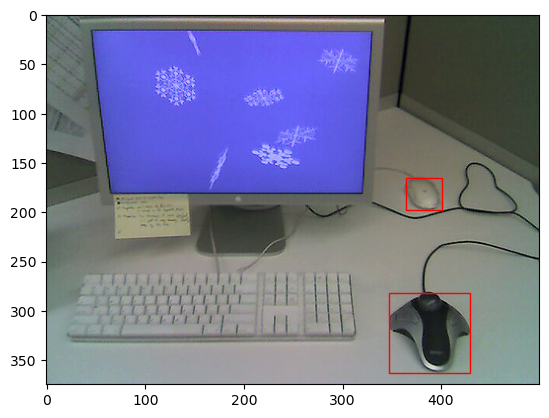

In [11]:
image_path = 'D:/imagenet_val/n03793489/ILSVRC2012_val_00014424.JPEG'
image = Image.open(image_path)
specific_item = data['ILSVRC2012_val_00014424.JPEG']

fig, ax = plt.subplots(1)
ax.imshow(image)


for i,box in enumerate(specific_item['boxes']):
    if specific_item['scores'][i] < THRESHOLD:
        continue
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()